In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import csv, sqlite3

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [89]:
df = pd.read_csv('aus_real_estate.csv')

In [6]:
df.head()

,Price,Bedrooms,Bathrooms,SqFt,City,State,Year_Built,Type,Garage,Lot_Area
0,982112,4,1,1561,Adelaide,QLD,2021,Townhouse,0,1357
1,571388,3,2,3735,Melbourne,VIC,1999,House,1,8397
2,866821,5,1,2032,Sydney,VIC,1976,Townhouse,0,3478
3,1230977,4,3,3861,Brisbane,SA,1978,House,0,7619
4,241787,4,2,3150,Perth,SA,1992,Apartment,0,8324


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Price       5000 non-null   int64 
 1   Bedrooms    5000 non-null   int64 
 2   Bathrooms   5000 non-null   int64 
 3   SqFt        5000 non-null   int64 
 4   City        5000 non-null   object
 5   State       5000 non-null   object
 6   Year_Built  5000 non-null   int64 
 7   Type        5000 non-null   object
 8   Garage      5000 non-null   int64 
 9   Lot_Area    5000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 390.8+ KB


In [8]:
df.isnull().sum()

Price         0
Bedrooms      0
Bathrooms     0
SqFt          0
City          0
State         0
Year_Built    0
Type          0
Garage        0
Lot_Area      0
dtype: int64

In [12]:
len(df)

df.head()

,Price,Bedrooms,Bathrooms,SqFt,City,State,Year_Built,Type,Garage,Lot_Area
0,982112,4,1,1561,Adelaide,QLD,2021,Townhouse,0,1357
1,571388,3,2,3735,Melbourne,VIC,1999,House,1,8397
2,866821,5,1,2032,Sydney,VIC,1976,Townhouse,0,3478
3,1230977,4,3,3861,Brisbane,SA,1978,House,0,7619
4,241787,4,2,3150,Perth,SA,1992,Apartment,0,8324


In [13]:
df_cleaned = df.dropna()

In [14]:
len(df_cleaned)

5000

In [23]:
max_value =  df_cleaned['Price'].max()
max_value

1999701

In [27]:
df_cleaned['PriceSegment'] = pd.cut(df_cleaned['Price'],bins = [0, 5000, 100000, 1000000, np.inf], 
                                 labels = ['Affordable', 'Mid-range', 'High-end', 'Luxury']
)


city_area = ['Sydney','Melbourne','Brisbane']
df_city = df_cleaned[df_cleaned['City'].isin(city_area)]


In [29]:
df_city = df_city[['City','State','SqFt','Bedrooms','Bathrooms','Price','PriceSegment']]
df_city

,City,State,SqFt,Bedrooms,Bathrooms,Price,PriceSegment
1,Melbourne,VIC,3735,3,2,571388,High-end
2,Sydney,VIC,2032,5,1,866821,High-end
3,Brisbane,SA,3861,4,3,1230977,Luxury
5,Brisbane,SA,1923,4,2,631871,High-end
7,Brisbane,QLD,2447,1,1,1509971,Luxury
...,...,...,...,...,...,...,...
4992,Sydney,WA,2275,3,3,1877774,Luxury
4994,Brisbane,WA,3399,4,2,951568,High-end
4996,Brisbane,QLD,1117,3,1,1634457,Luxury
4998,Sydney,QLD,1825,3,3,1976680,Luxury


In [30]:
con = sqlite3.connect('AU_HousePrice.db')
cur = con.cursor()

In [31]:
%load_ext sql 

In [32]:
%sql sqlite:///AU_HousePrice.db

In [33]:
df_city.to_sql('CityArea',con,if_exists = 'replace',index = False)

2972

In [34]:
%%sql 
SELECT *
FROM CityArea
WHERE [Price] >= 1000000

 * sqlite:///AU_HousePrice.db
Done.


City,State,SqFt,Bedrooms,Bathrooms,Price,PriceSegment
Brisbane,SA,3861,4,3,1230977,Luxury
Brisbane,QLD,2447,1,1,1509971,Luxury
Melbourne,NSW,1842,5,3,1453282,Luxury
Melbourne,NSW,810,4,2,1476267,Luxury
Brisbane,QLD,2231,3,3,1726874,Luxury
Melbourne,VIC,2890,4,1,1358342,Luxury
Melbourne,SA,2845,4,2,1712788,Luxury
Melbourne,SA,1440,5,1,1874185,Luxury
Sydney,SA,2619,2,2,1183917,Luxury
Brisbane,SA,1180,4,2,1961716,Luxury


In [35]:
con.close()

# Phân tích giá nhà tại các khu vực thành phố lớn

In [36]:
stats = df_city.describe()
print("Thống kê mô tả tổng quát cho giá bất động sản")
print(stats.to_string(float_format='{:.2f}'.format))

Thống kê mô tả tổng quát cho giá bất động sản
         SqFt  Bedrooms  Bathrooms      Price
count 2972.00   2972.00    2972.00    2972.00
mean  2385.15      2.99       1.98 1056062.95
std    920.90      1.40       0.81  553218.38
min    802.00      1.00       1.00  100564.00
25%   1583.75      2.00       1.00  582129.50
50%   2379.50      3.00       2.00 1053690.00
75%   3176.75      4.00       3.00 1539263.25
max   3998.00      5.00       3.00 1999701.00


In [37]:
# Độ biến thiên giá theo khu vực
Price_variance_by_location = df_city.groupby('State')['Price'].var()

print(Price_variance_by_location.to_string(float_format='{:.2f}'.format))

State
NSW   311330252945.55
QLD   310875433582.29
SA    291779651529.79
VIC   301285609404.58
WA    311248635968.89


In [38]:
# Số lượng bất động sản theo khu vực

count_by_City = df['City'].value_counts()
count_by_City

City
Adelaide     1040
Melbourne    1021
Brisbane     1007
Perth         988
Sydney        944
Name: count, dtype: int64

In [39]:
# Hệ số biến thiên giá (coeefficient of variation) 
cv = df_city['Price'].std() / df_city['Price'].mean()
cv

0.5238498113469865

In [40]:
# Độ phân tán giá
Price_range = df_city['Price'].max() - df_city['Price'].min()

Price_range

1899137

In [41]:
Q1 = df_city['Price'].quantile(0.25)
Q3 = df_city['Price'].quantile(0.75)

IQR = Q3 - Q1 

outliers = df_city[(df_city['Price'] < (Q1 - 1.5 * IQR)) | (df_city['Price'] > (Q3 + 1.5 * IQR))]

outliers

,City,State,SqFt,Bedrooms,Bathrooms,Price,PriceSegment


In [42]:
# Độ lệch trung bình tuyệt đối (mean absolute deviation)
Price_data = df_city['Price']
mean_Price = Price_data.mean()

mad = (Price_data - mean_Price).abs().mean()

mad


479147.163494092

In [43]:
# Tần suất xuất hiện của giá (frequency analysis)
frequency = df_city['PriceSegment'].value_counts()
frequency

PriceSegment
Luxury        1568
High-end      1404
Affordable       0
Mid-range        0
Name: count, dtype: int64

In [44]:
# Hệ số tương quan giữa gía và diện tích
corr_Price_area = df_city['Price'].corr(df_city['SqFt'])
corr_Price_area

-0.011602838067318356

In [45]:
# Hệ số tương quan giữa giá và phòng ngủ
corr_Price_Bedrooms = df_city['Price'].corr(df_city['Bedrooms'])
corr_Price_Bedrooms

-0.008964668396868512

In [46]:
# Hệ số tương quan giữa vùng 
mean_Price_by_location = df_city.groupby('State')['Price'].mean()
print(mean_Price_by_location.to_string(float_format='{:.2f}'.format))

State
NSW   1051016.26
QLD   1027178.77
SA    1046833.75
VIC   1035296.20
WA    1117958.15


In [47]:
outliers_upper = df_city[df_city['Price'] > (Q3 + 1.5 * IQR)]
outliers_lower = df_city[df_city['Price'] < (Q1 - 1.5 * IQR)]
print(f'Outliers upper : {outliers_upper}')
print(f'Outliers lower : {outliers_lower}')

Outliers upper : Empty DataFrame
Columns: [City, State, SqFt, Bedrooms, Bathrooms, Price, PriceSegment]
Index: []
Outliers lower : Empty DataFrame
Columns: [City, State, SqFt, Bedrooms, Bathrooms, Price, PriceSegment]
Index: []


In [48]:
Price_quantiles = df_city['Price'].quantile([0.25,0.5,0.7,1.0])
Price_quantiles

0.25     582129.5
0.50    1053690.0
0.70    1435183.1
1.00    1999701.0
Name: Price, dtype: float64

# Data Visualization

In [49]:
df_city.head()

,City,State,SqFt,Bedrooms,Bathrooms,Price,PriceSegment
1,Melbourne,VIC,3735,3,2,571388,High-end
2,Sydney,VIC,2032,5,1,866821,High-end
3,Brisbane,SA,3861,4,3,1230977,Luxury
5,Brisbane,SA,1923,4,2,631871,High-end
7,Brisbane,QLD,2447,1,1,1509971,Luxury


Text(0, 0.5, 'Giá BĐS trung bình (USD')

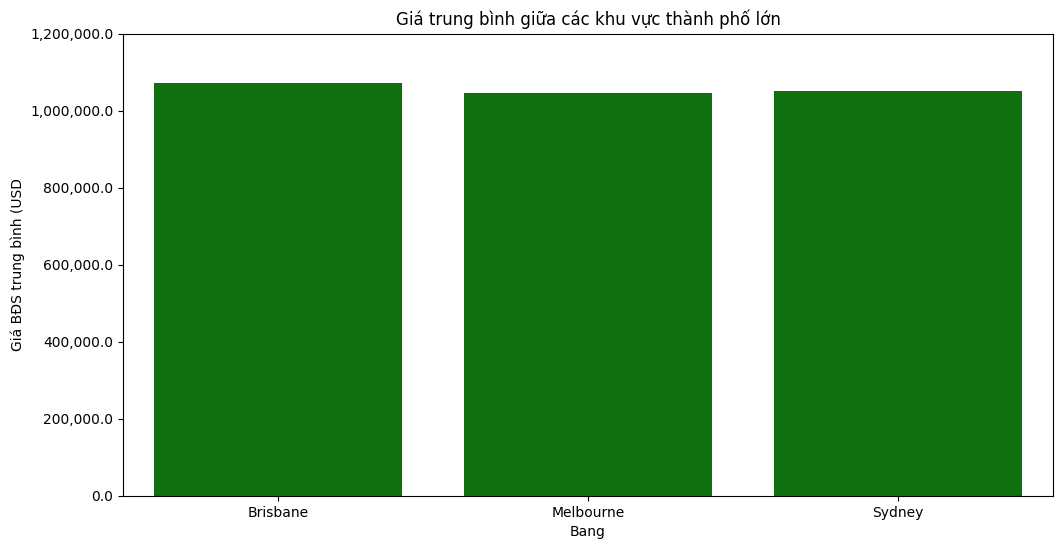

In [54]:
average_State = df_city.groupby('City')['Price'].mean()

plt.figure(figsize =(12,6))
sns.barplot(x =average_State.index, y =average_State.values, color = 'green')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(1):,.1f}' for tick in yticks])

plt.title('Giá trung bình giữa các khu vực thành phố lớn')
plt.xlabel('Bang')
plt.ylabel('Giá BĐS trung bình (USD')

Text(0, 0.5, 'USD')

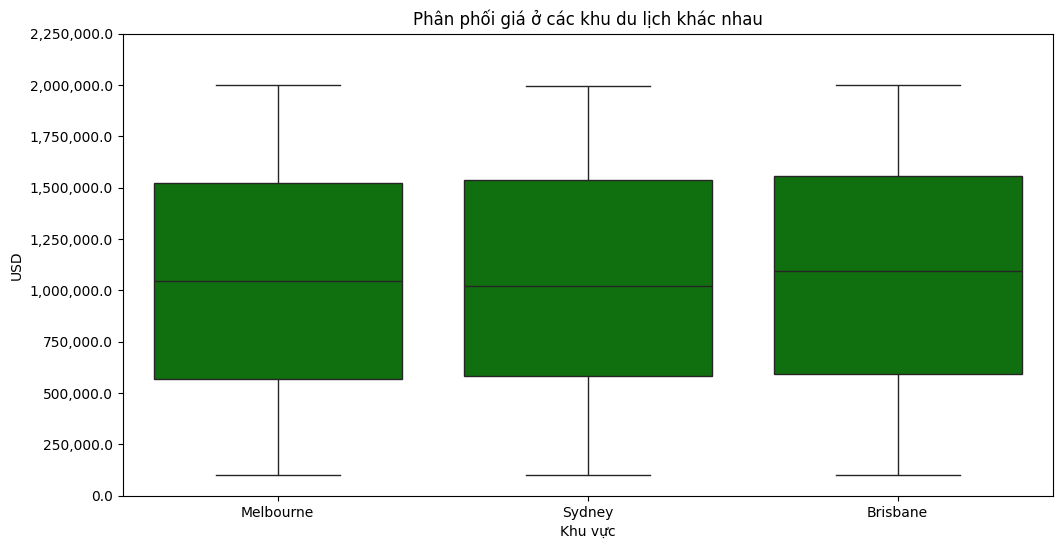

In [53]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'City', y = 'Price', data = df_city, color = 'Green')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(1):,.1f}' for tick in yticks])


plt.title('Phân phối giá ở các khu du lịch khác nhau')
plt.xlabel('Khu vực')
plt.ylabel('USD')

''

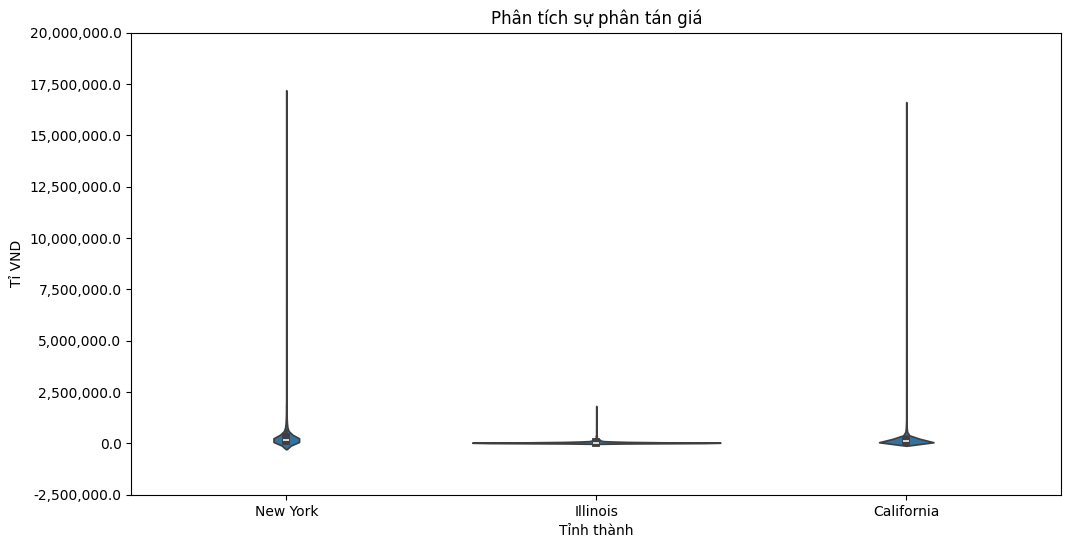

In [90]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='State', y='Price', data=df_city)

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10*(1)):,.1f}' for tick in yticks])

plt.title('Phân tích sự phân tán giá')
plt.xlabel('Tỉnh thành')
plt.ylabel('Tỉ VND')
;

Text(0, 0.5, 'Giá USD')

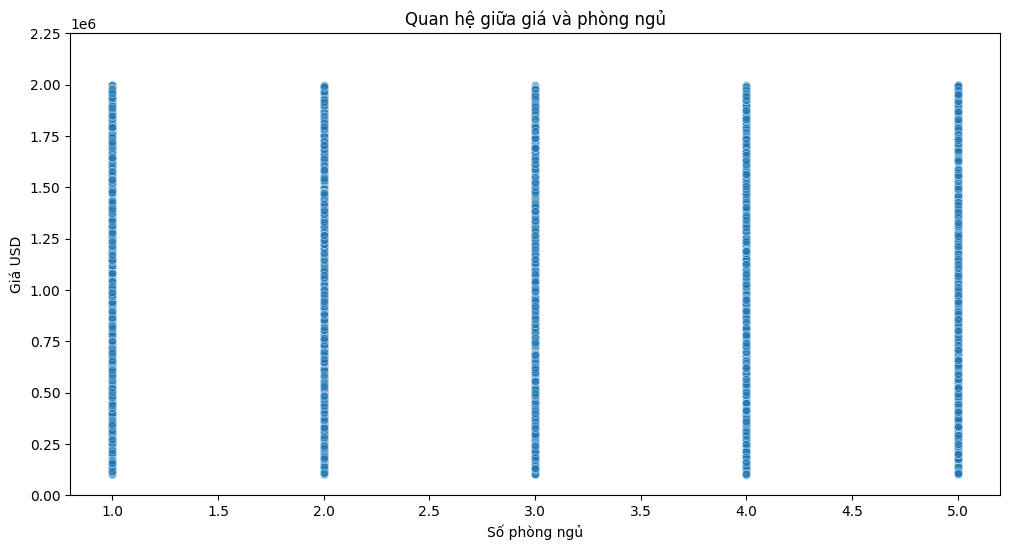

In [55]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='Bedrooms', y='Price', data=df_city, alpha=0.5)

yticks = plt.yticks()[0]
plt.yticks(yticks,label = [f'{float(tick) / (10):,.1f}' for tick in yticks])

plt.title('Quan hệ giữa giá và phòng ngủ')

plt.xlabel('Số phòng ngủ')
plt.ylabel('Giá USD')

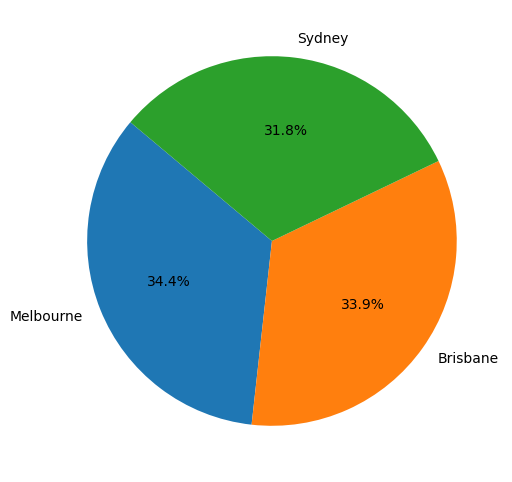

In [57]:
real_eState_counts = df_city['City'].value_counts()

plt.figure(figsize = (12,6))
plt.pie(real_eState_counts, labels = real_eState_counts.index, autopct ='%1.1f%%', startangle = 140);

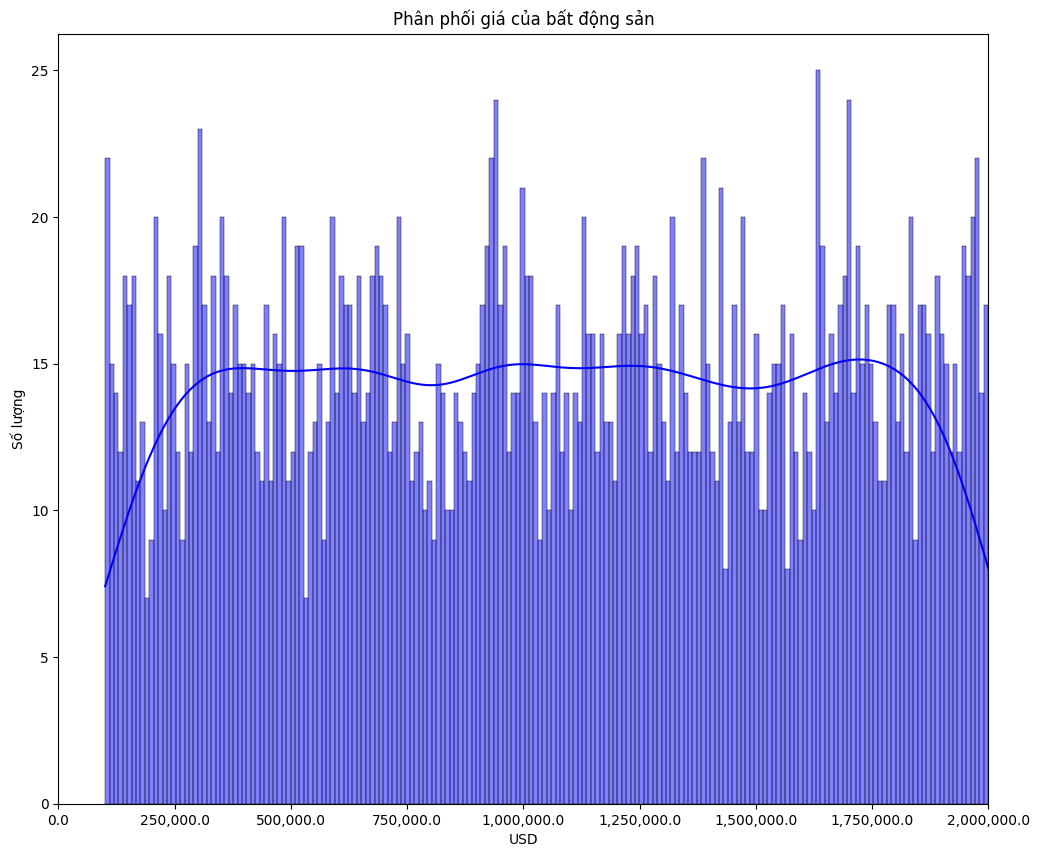

In [71]:
plt.figure(figsize=(12, 10))
sns.histplot(df_city['Price'], kde=True, color='blue',bins = 200)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick):,.1f}' for tick in xticks])
plt.xlim(0)
plt.xlim(0,2000000)

plt.title('Phân phối giá của bất động sản')
plt.xlabel('USD')
plt.ylabel('Số lượng');

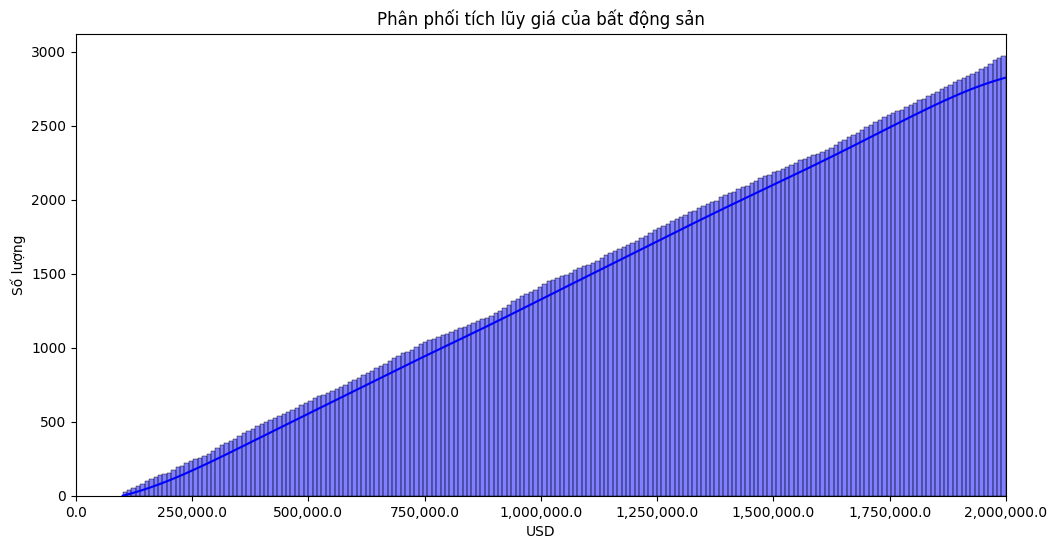

In [68]:
plt.figure(figsize=(12, 6))
sns.histplot(df_city['Price'], kde=True, color='blue', cumulative=True, bins=200)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick):,.1f}' for tick in xticks])
plt.xlim(0,2000000)

plt.title('Phân phối tích lũy giá của bất động sản')
plt.xlabel('USD')
plt.ylabel('Số lượng');

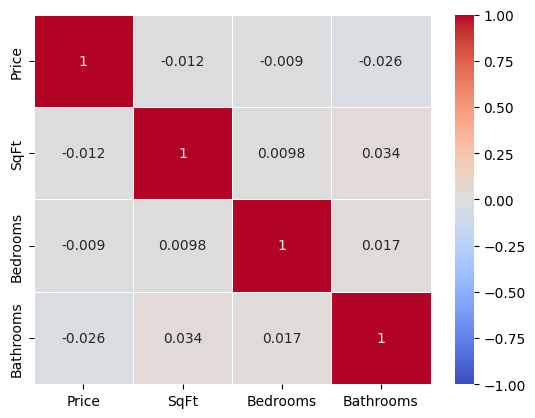

In [72]:
# Heatmap: Tương quan giữa giá và các yếu tố khác.
corr_matrix = df_city[['Price', 'SqFt','Bedrooms', 'Bathrooms']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5);

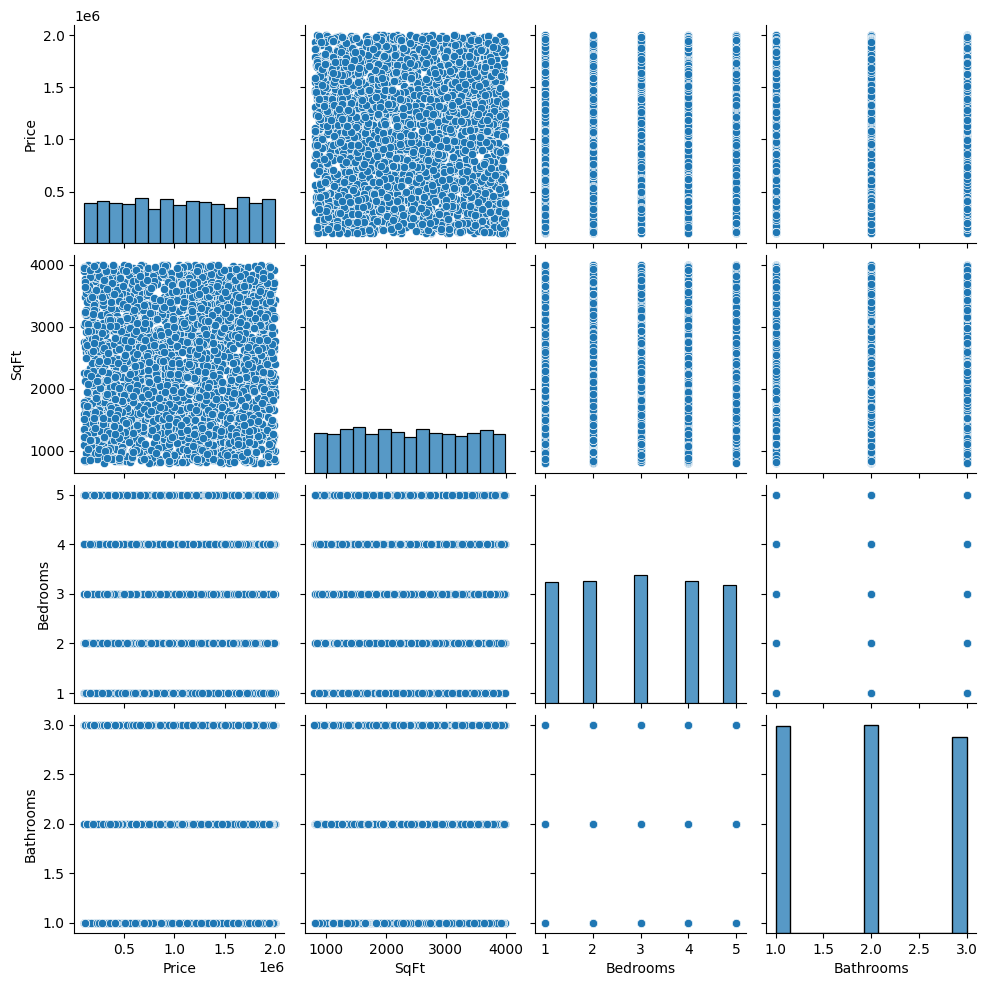

In [73]:
sns.pairplot(df_city[['Price', 'SqFt','Bedrooms', 'Bathrooms']]);

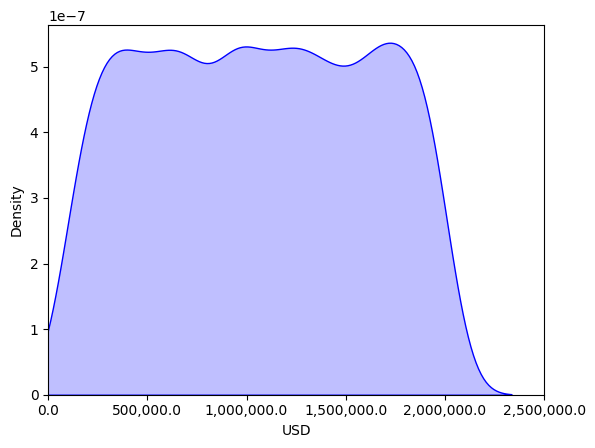

In [75]:
sns.kdeplot(df_city['Price'], color='blue', fill=True)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick):,.1f}' for tick in xticks])
plt.xlim(0)

plt.xlabel('USD');

''

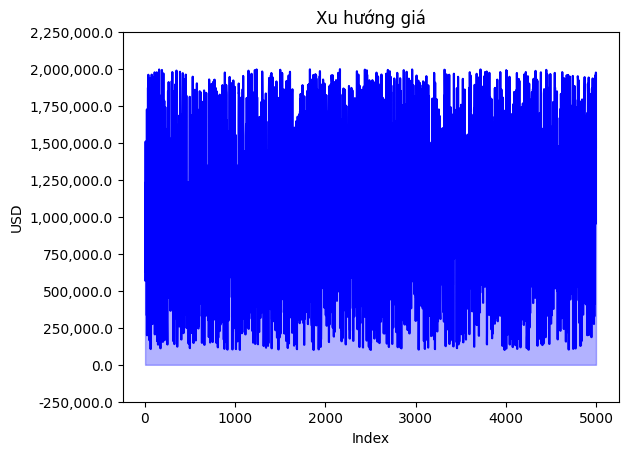

In [76]:
sns.lineplot(data=df_city['Price'], color='blue')
plt.fill_between(df_city.index, df_city['Price'], color='blue', alpha=0.3)

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick):,.1f}' for tick in yticks])

plt.title('Xu hướng giá')
plt.xlabel('Index')
plt.ylabel('USD')
;


''

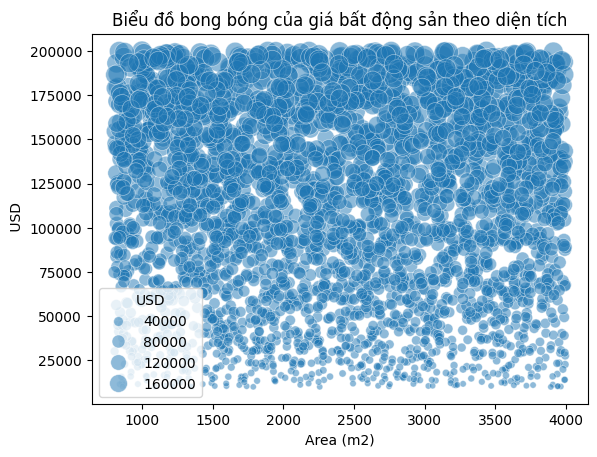

In [82]:
Price_billion = df_city['Price'].apply(lambda x: x/(10))

sns.scatterplot(x=df_city.SqFt, y=Price_billion, size=Price_billion, sizes=(20, 200), alpha=0.5)

plt.title('Biểu đồ bong bóng của giá bất động sản theo diện tích')
plt.xlabel('Area (m2)')
plt.ylabel(' USD')

plt.legend(title='USD', fontsize='10')

;

In [84]:
# Huấn luyện mô hình
X = df_city[['SqFt', 'Bedrooms', 'Bathrooms']]
Y = df_city[['Price']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
Price_predictions = model.predict(X_test)

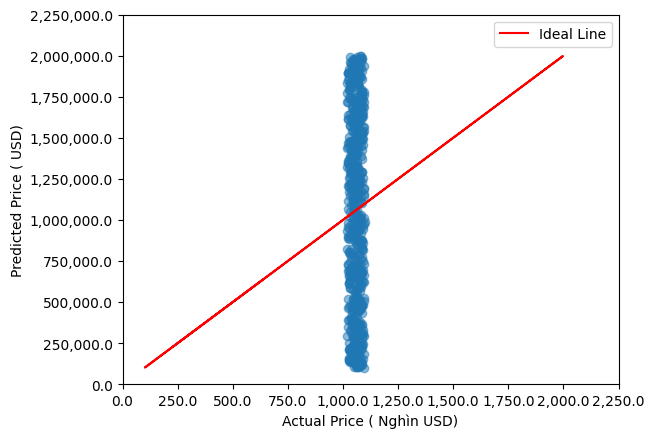

In [96]:
# Visualize khả năng dự đoán
plt.scatter(x=Price_predictions, y=Y_test.values, alpha=0.5)
plt.plot(Y_test.values, Y_test.values, color='red', label='Ideal Line')

plt.ylabel('Predicted Price ( USD)')
plt.xlabel('Actual Price ( Nghìn USD)')
plt.legend()

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10**3):,.1f}' for tick in xticks])

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick):,.1f}' for tick in yticks]);